<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Prediction_Conforme_jeu_de_donn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nous nous proposons ce jeu de données de  **"Résistance à la compression du béton"** pour le projet de REGRESSION QUANTILE.

Description des variables :

Voici une description des variables dans le jeu de données de la résistance à la compression du béton :


1.   **Cement (component 1) (kg in a m³ mixture)** : La quantité de ciment dans le mélange de béton, mesurée en kilogrammes par mètre cube.
2.   **Blast Furnace Slag (component 2) (kg in a m³ mixture)** : La quantité de laitier de haut fourneau, un sous-produit des processus de fusion de fer, utilisé comme substitut partiel du ciment.
3.   **Fly Ash (component 3) (kg in a m³ mixture)**: La quantité de cendres volantes, un résidu provenant de la combustion du charbon, également utilisé comme substitut partiel du ciment.
4.   **Water (component 4) (kg in a m³ mixture)** : La quantité d'eau dans le mélange, en kilogrammes par mètre cube. L'eau est essentielle pour l'hydratation du ciment.
5.   **Superplasticizer (component 5) (kg in a m³ mixture)** : La quantité de superplastifiant, un additif utilisé pour améliorer la maniabilité du mélange sans augmenter le rapport eau/ciment.
6.   **Coarse Aggregate (component 6) (kg in a m³ mixture)** : La quantité d'agrégat grossier (gravier) dans le mélange, mesurée en kilogrammes par mètre cube.
7.   **Fine Aggregate (component 7) (kg in a m³ mixture)** : La quantité d'agrégat fin (sable) dans le mélange, mesurée en kilogrammes par mètre cube.
8.    **Age (day)** : L'âge du béton en jours. Cette variable mesure le nombre de jours écoulés depuis la production du béton, ce qui affecte sa résistance à la compression.
9.   **Concrete Compressive Strength (MPa, megapascals)** : La résistance à la compression du béton, mesurée en mégapascals (MPa). C'est la variable cible dans le jeu de données, qui indique la capacité du béton à résister à des forces de compression.



On installe la bibliothèque ucimlrepo pour pouvoir extraire des données

In [ ]:
pip install ucimlrepo

Extraction des données. X représente les caractéristiques et y les étiquettes ce que nous cherchons à prédire.

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

On concatene les données X et y en une seule donnée que l'on appelle data

In [ ]:
import pandas as pd

# Concaténation des deux DataFrames
data = pd.concat([X, y], axis=1)

On prévisualise les données.

In [ ]:
data.head(7)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70


Nous vérifions s'il n'y a pas de données manquantes. On constate qu'il n'y a pas de valeurs manquantes dans notre jeu de données d'après l'étape suivante.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
#Description des données
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Pour certains composants tels que Blast Furnace Slag, Fly Ash, et Superplasticizer, la valeur minimale (valeur minimale dans cette colonne) est de 0. Habituellement, la valeur 0 serait considérée comme une valeur manquante. Cependant, dans ce projet, la valeur 0 sera interprétée comme signifiant que le composant n'a pas été utilisé dans le processus de mélange.

**Visualisation des données**

<Figure size 800x400 with 0 Axes>

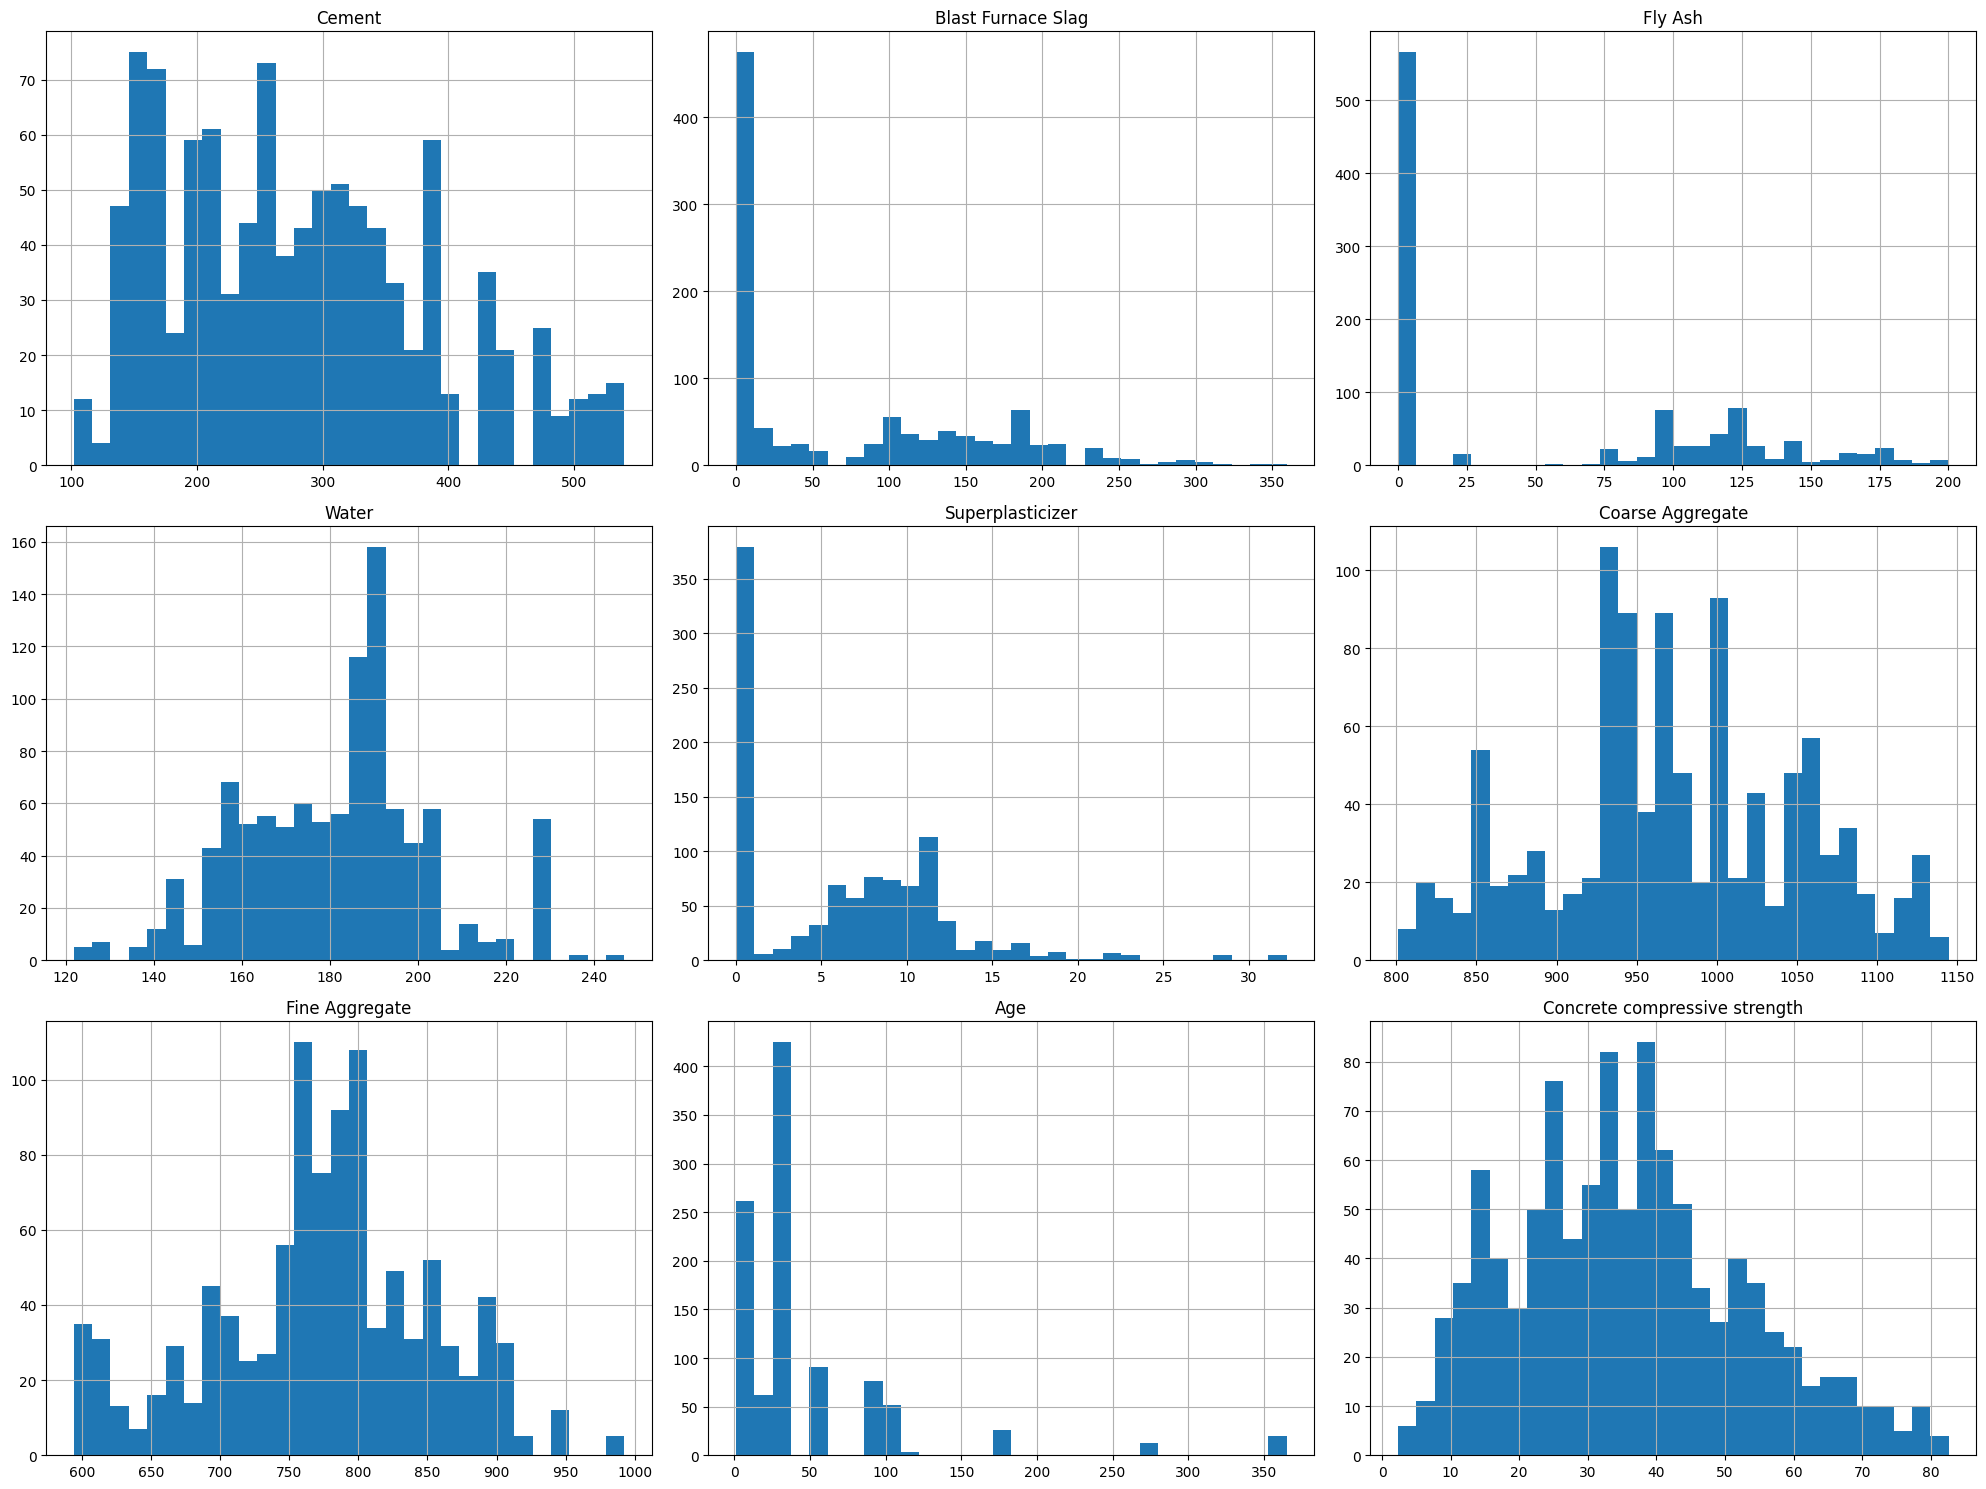

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuster la taille des graphiques
plt.figure(figsize=(8, 4))

# Histogramme pour visualiser la distribution des variables
data.hist(bins=30, figsize=(20, 15), layout=(3, 3))
plt.tight_layout()
plt.show()

  Cela montre la quantité de chaque composant utilisé dans le processus de mélange. On peut constater qu'il y a de nombreuses valeurs de 0 pour les composants Blast Furnace Slag, Fly Ash, and Superplasticizer. On peut en conclure que ces trois composants sont rarement utilisés dans le processus de mélange du béton.

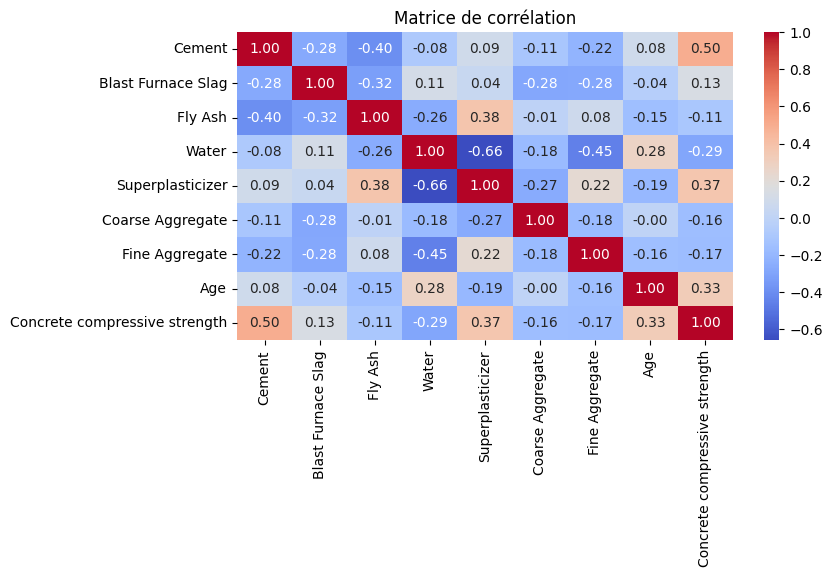

In [ ]:
# Matrice de corrélation avec une heatmap
plt.figure(figsize=(8, 4))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()

Cela montre les corrélations entre les variables. La résistance à la compression du béton est positivement corrélée avec la quantité de ciment et l'âge du béton.

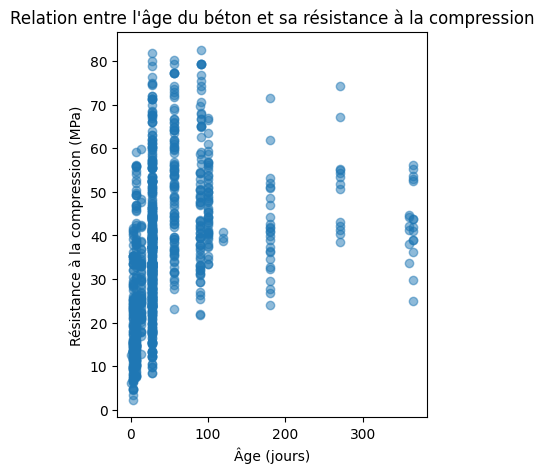

In [ ]:
# Scatter plot (nuage de points) pour voir la relation entre l'âge et la résistance à la compression
plt.figure(figsize=(4, 5))
plt.scatter(data['Age'], data['Concrete compressive strength'], alpha=0.5)
plt.title('Relation entre l\'âge du béton et sa résistance à la compression')
plt.xlabel('Âge (jours)')
plt.ylabel('Résistance à la compression (MPa)')
plt.show()

Le graphique montre la tendance attendue d'une augmentation de la résistance à la compression du béton avec l'âge, mais cette croissance n'est pas linéaire et atteint un plateau après un certain temps.

**Regression quantile**

On importe les bibliothèques et on sépare les données cractéristiques et les étiquettes en remplaçant les virgules par des points dans les données

In [ ]:
# On importe les bibliothèques nécessaires pour la manipulation des données et la modélisation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import QuantileRegressor

# Remplacer les virgules par des points dans les données pour assurer une conversion correcte en flottants
data = data.replace(',', '.', regex=True).astype(float)

# Préparer les caractéristiques (X) et la cible (y)
X = data.drop(columns=["Concrete compressive strength"])
y = data["Concrete compressive strength"]

**Choix du quantile** : A cette étape, on divise le jeu de donnée en ensemble d'entraînement et ensemble test, on choisit le quantile 0.5 (la médiane).

In [ ]:
# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des quantiles à tester
quantiles = [0.2, 0.5, 0.7, 0.9]

**Entraînement du modèle**

In [ ]:
# Boucle sur les différents quantiles et entraînement du modèle pour chaque quantile
for quantile in quantiles:
    # Initialiser le modèle pour le quantile spécifique
    model = QuantileRegressor(quantile=quantile, alpha=0.01)

    # Entraîner le modèle
    model.fit(X_train, y_train)

    # Prédire sur les données de test
    y_pred = model.predict(X_test)

    # Calculer le coefficient de détermination R^2
    r2_score = model.score(X_test, y_test)

    # Afficher le résultat pour chaque quantile
    print(f"Quantile: {quantile}, R^2 score: {r2_score}")

Quantile: 0.2, R^2 score: 0.23390685225084518
Quantile: 0.5, R^2 score: 0.5231867115071009
Quantile: 0.7, R^2 score: 0.37954119449008517
Quantile: 0.9, R^2 score: -0.15169484869183125




*   **Meilleure performance pour le quantile 0.5 (médiane)** : Le modèle est le plus performant pour prédire les valeurs autour de la médiane (quantile 0.5). Cela signifie qu'il est meilleur pour expliquer les comportements centraux des données.
*   **Diminution des performances aux quantiles extrêmes (0.2 et 0.9)** : Le modèle semble moins performant aux extrêmes de la distribution, notamment pour les faibles et très fortes résistances à la compression. Cela suggère que le modèle pourrait être amélioré en ajoutant d'autres variables ou en adoptant une approche plus adaptée aux données extrêmes

